In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("..\\Data\\Timeseries_36.927_-2.374_SA2_34deg_0deg_2005_2020 (1).csv")    

In [6]:
df.head()

,time,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
0,20050101:0009,0.0,0.0,0.0,0.0,5.61,2.34,0.0
1,20050101:0109,0.0,0.0,0.0,0.0,4.94,2.48,0.0
2,20050101:0209,0.0,0.0,0.0,0.0,4.52,2.55,0.0
3,20050101:0309,0.0,0.0,0.0,0.0,4.18,2.62,0.0
4,20050101:0409,0.0,0.0,0.0,0.0,3.95,2.62,0.0


In [7]:
df.describe()

,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.0
mean,184.341381,67.879275,3.866792,16.124256,17.622294,2.594660,0.0
std,281.187549,87.396374,5.340107,21.349822,6.869593,1.389428,0.0
min,0.000000,0.000000,0.000000,-1.730000,-1.040000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,12.160000,1.590000,0.0
50%,0.000000,0.000000,0.000000,0.000000,17.380000,2.340000,0.0
75%,344.947500,135.190000,7.460000,30.280000,22.860000,3.380000,0.0
max,1055.730000,456.220000,18.570000,76.510000,38.210000,9.790000,0.0


In [8]:
# Check the data types
df.dtypes

time      object
Gb(i)    float64
Gd(i)    float64
Gr(i)    float64
H_sun    float64
T2m      float64
WS10m    float64
Int      float64
dtype: object

In [10]:

# Convert the time column to datetime
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')
#df['time(UTC)'] = df['time(UTC)'].dt.strftime('%m%d:%H%M')

<Axes: xlabel='time', ylabel='Gb(i)'>

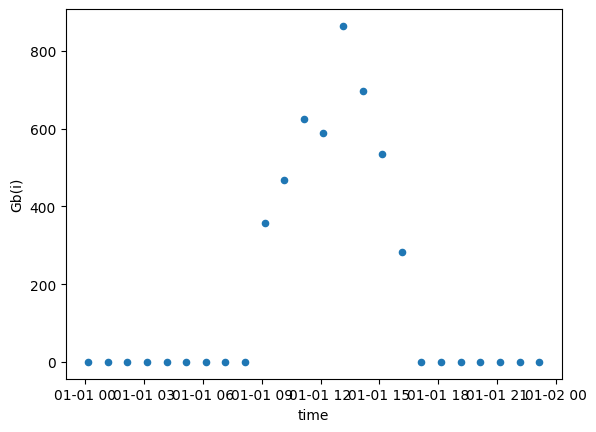

In [14]:

df[:24].plot(x='time', y='Gb(i)', kind='scatter')

# Data visualization

## Features:

T2m: 2-m air temperature (degree Celsius)
RH: relative humidity (%)
G(h): Global irradiance on the horizontal plane (W/m2)
Gb(n): Beam/direct irradiance on a plane always normal to sun rays (W/m2)
Gd(h): Diffuse irradiance on the horizontal plane (W/m2)
IR(h): Surface infrared (thermal) irradiance on a horizontal plane (W/m2)
WS10m: 10-m total wind speed (m/s)
WD10m: 10-m wind direction (0 = N, 90 = E) (degree)
SP: Surface (air) pressure (Pa)

PVGIS (c) European Union, 2001-2024

c:\Users\Idener\miniconda3\envs\T2_4\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\Users\Idener\miniconda3\envs\T2_4\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\Users\Idener\miniconda3\envs\T2_4\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\Users\Idener\miniconda3\envs\T2_4\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\Users\Idener\miniconda3\envs\T2_4\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Par

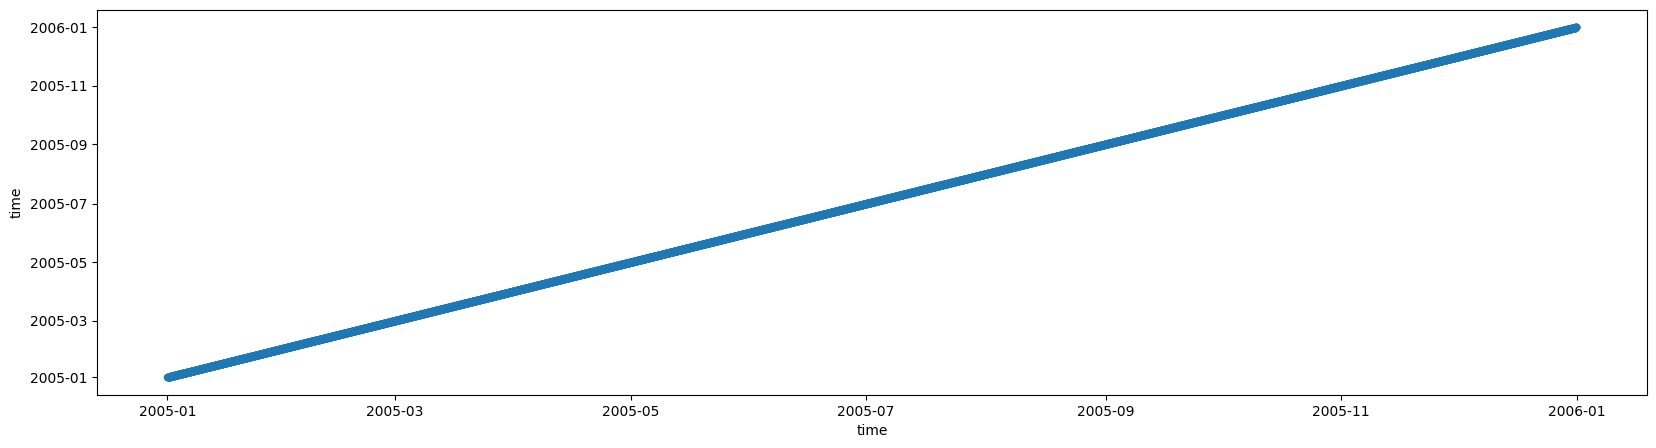

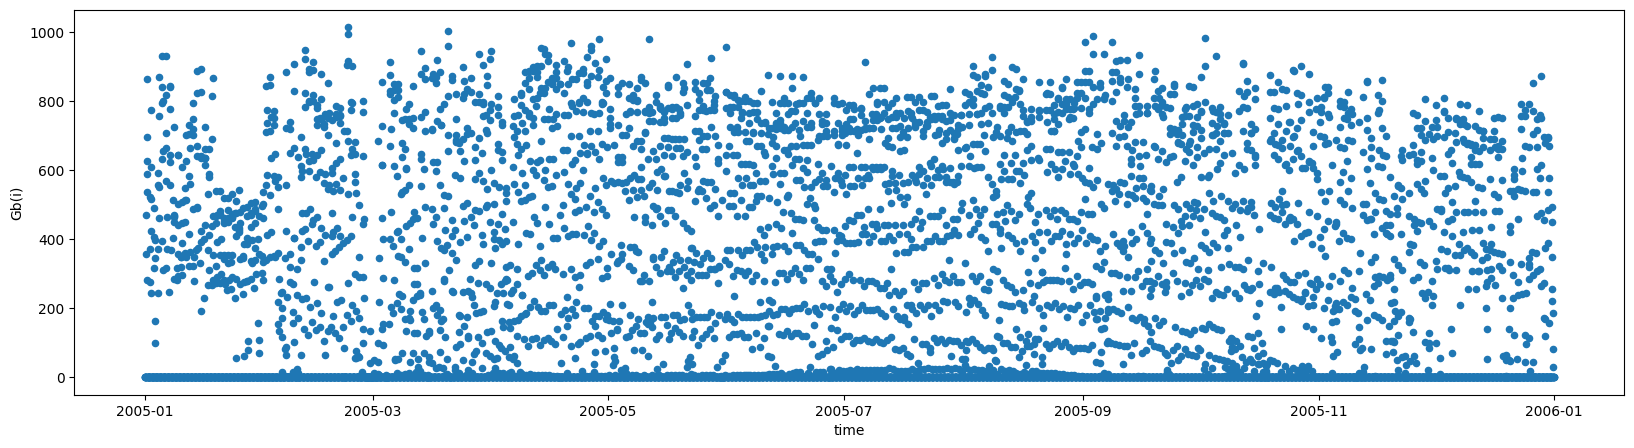

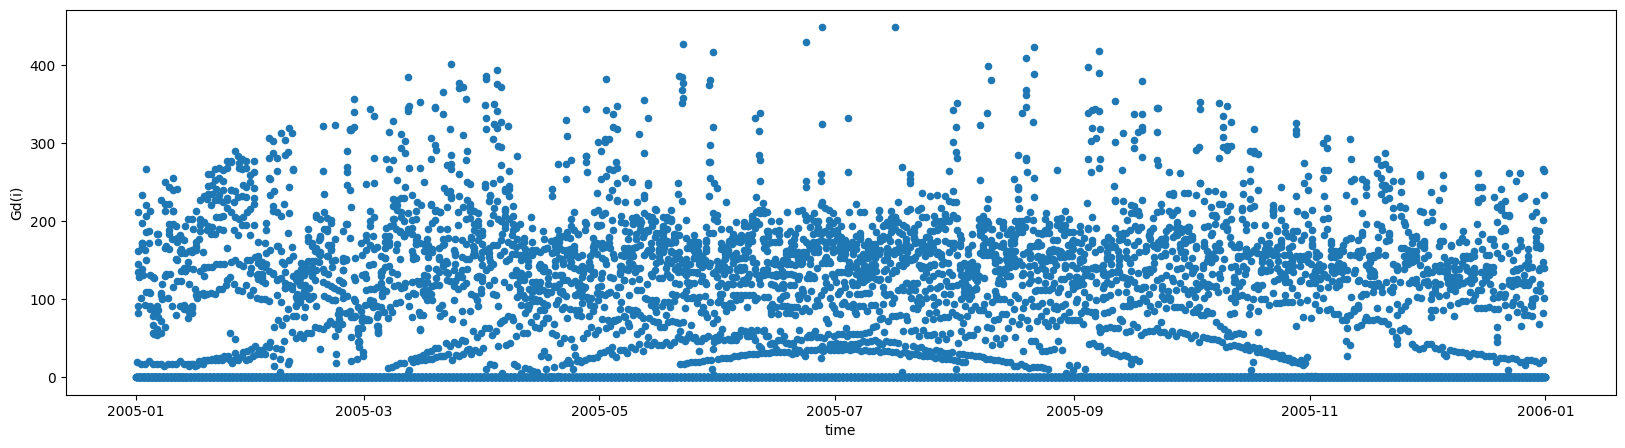

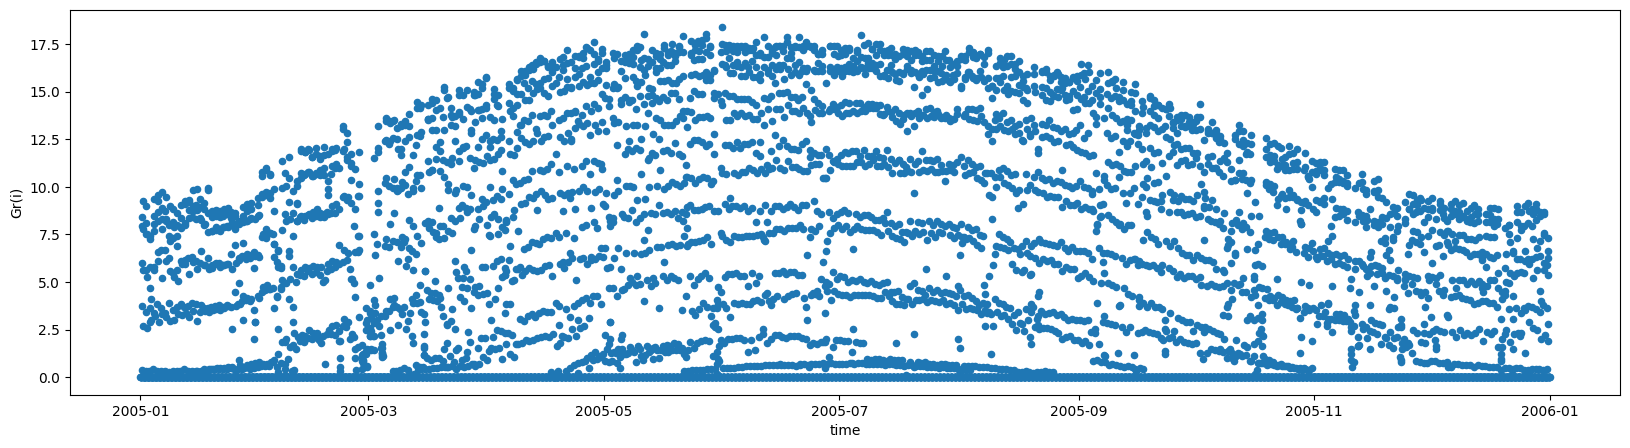

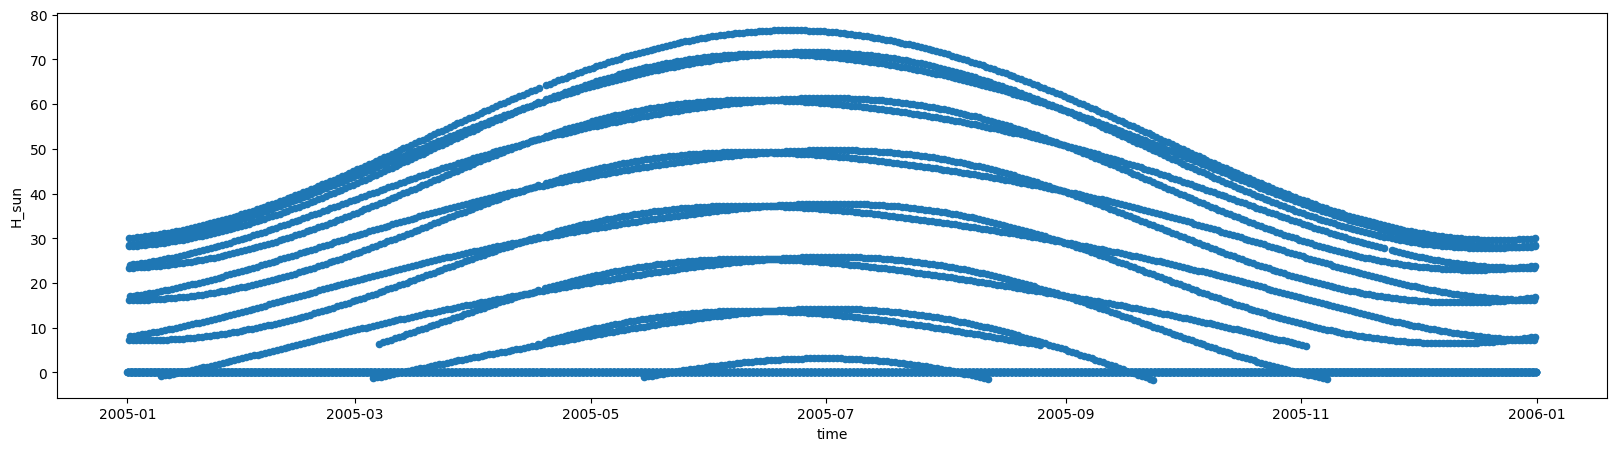

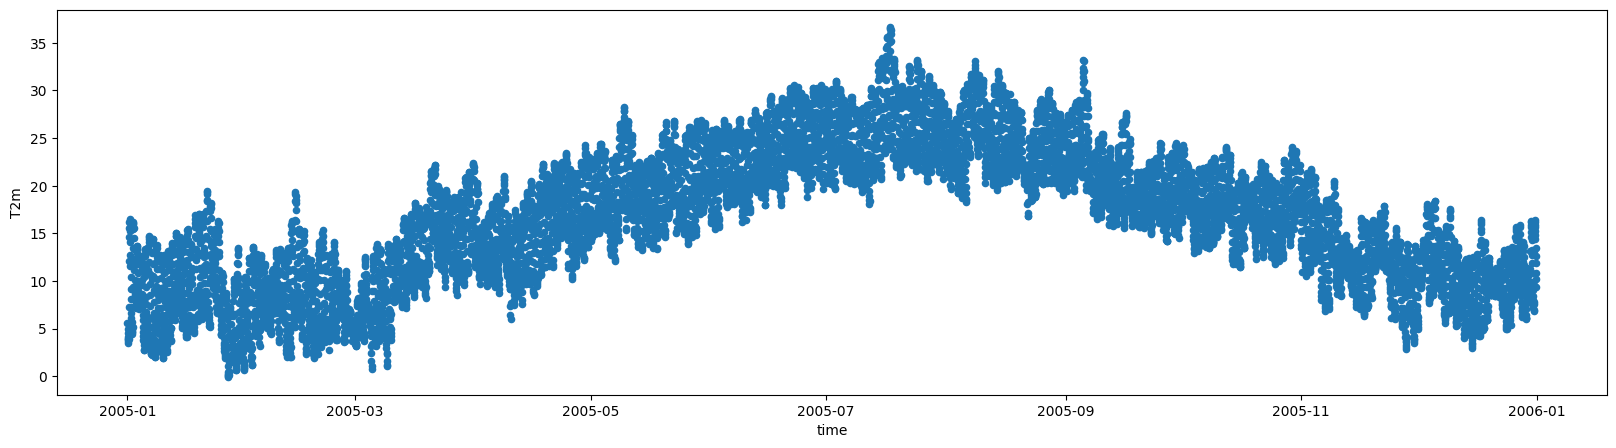

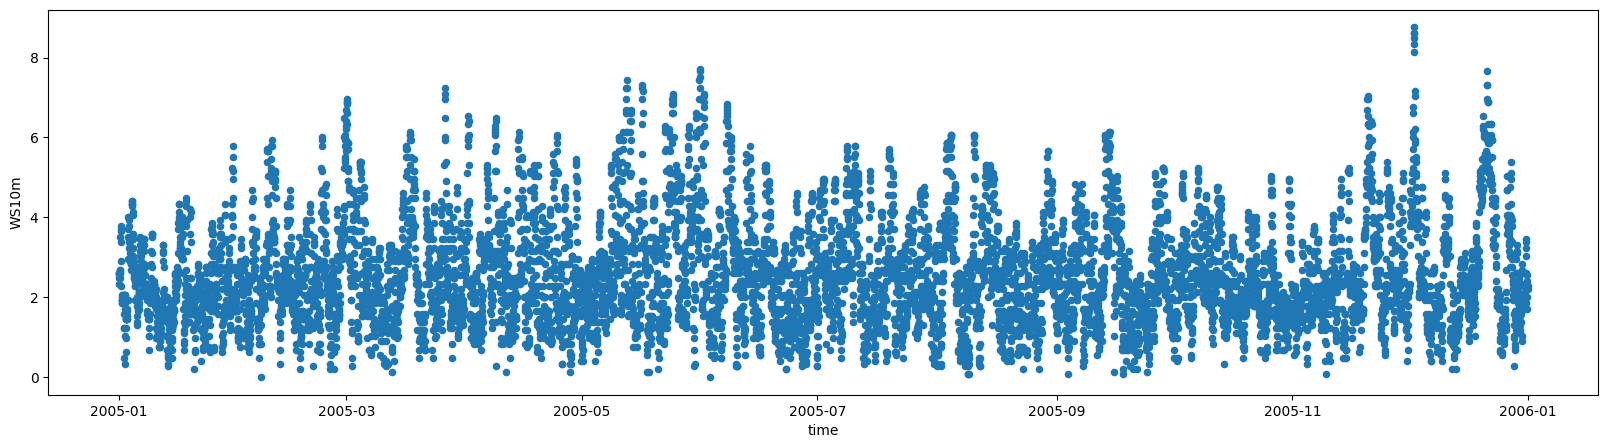

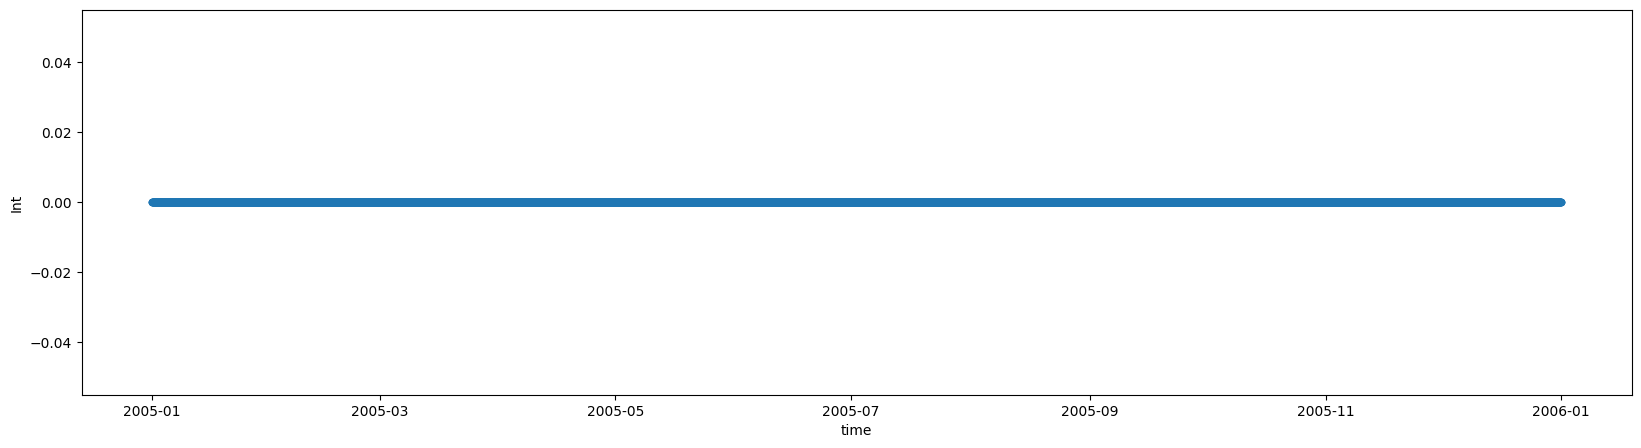

In [18]:
df.sort_values(by='time', inplace=True)
cols = df.columns

end = 24 * 365

for col in cols: 
    df[:end].plot.scatter(x = "time", y=col, colormap='viridis', figsize=(20, 5))

<Axes: >

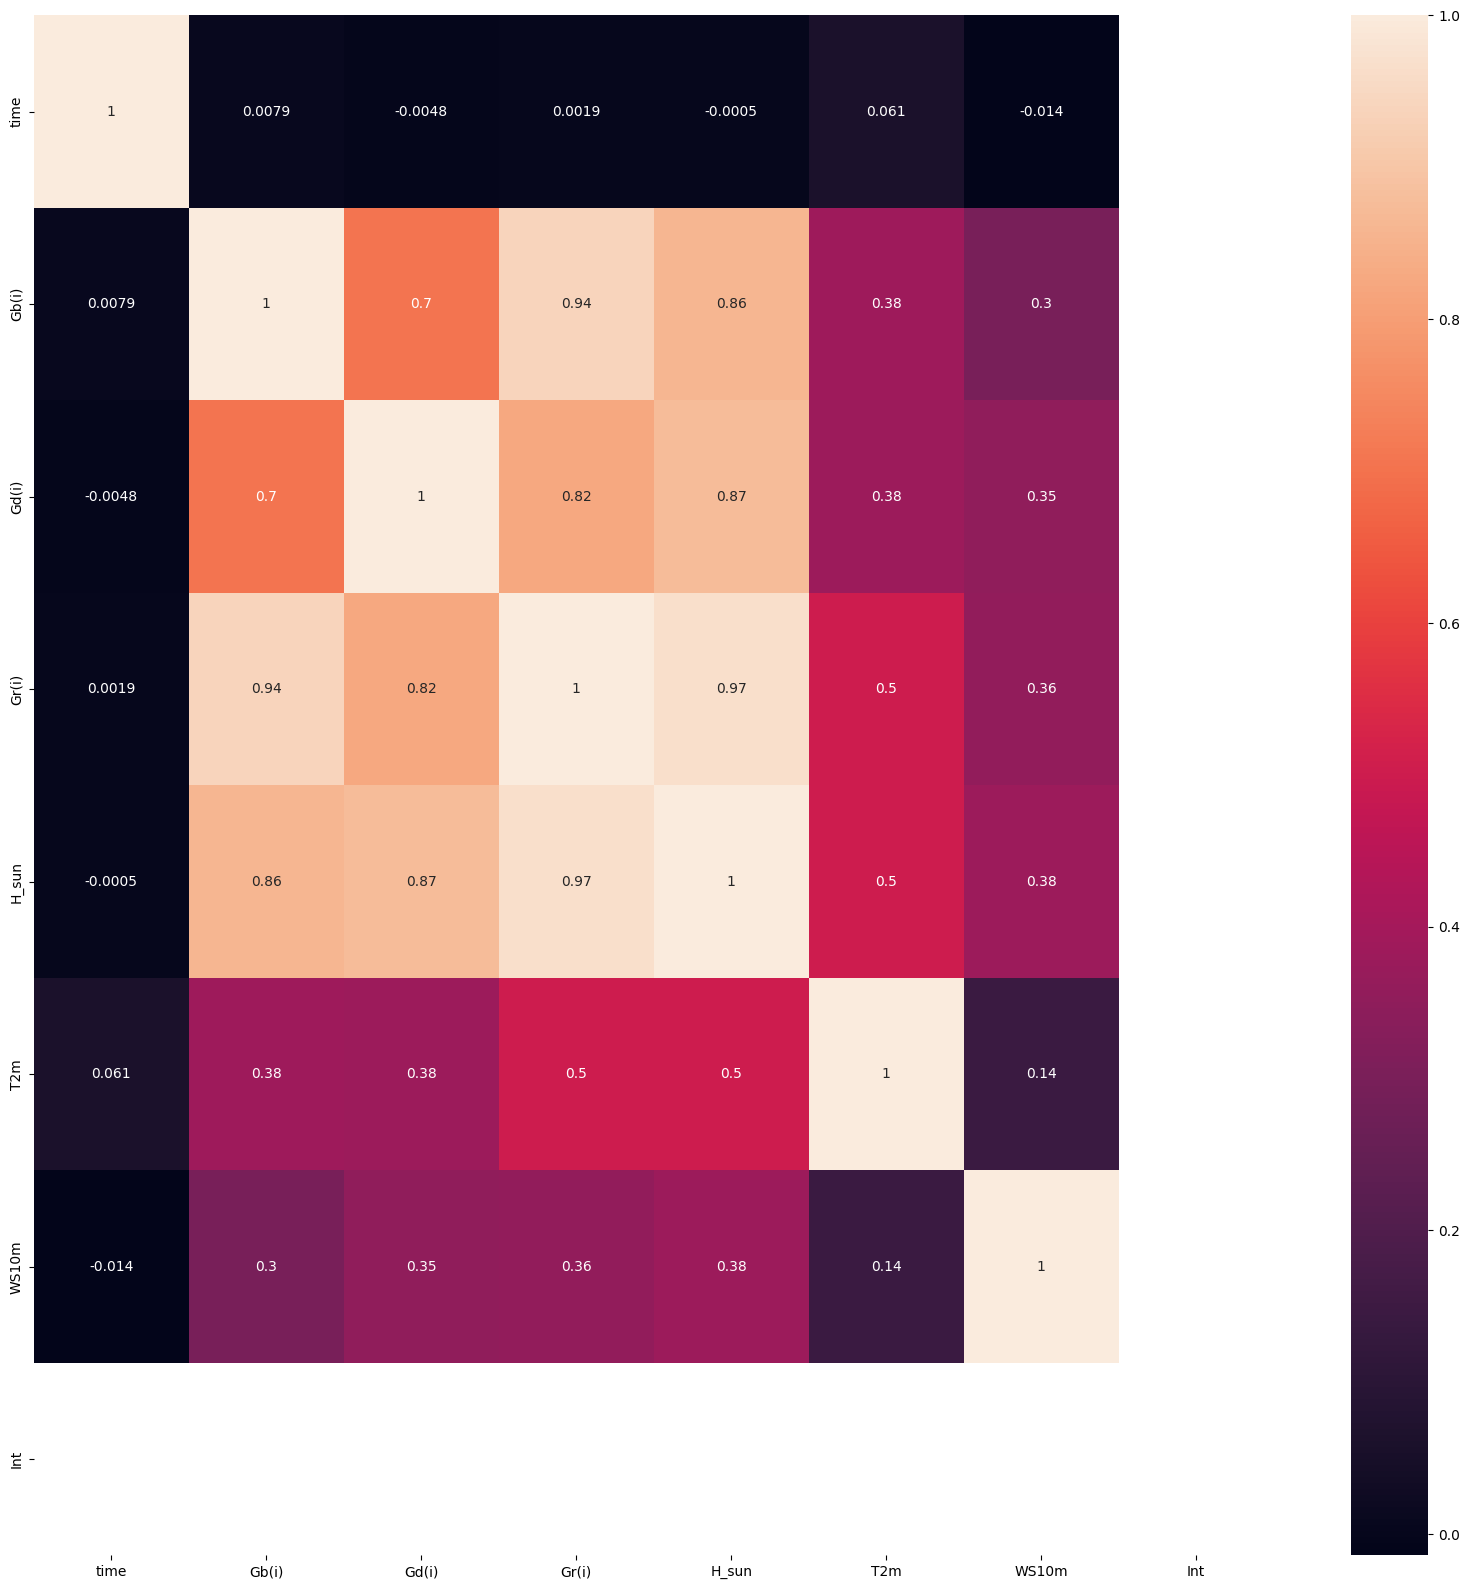

In [17]:
# Correlation matrix
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)


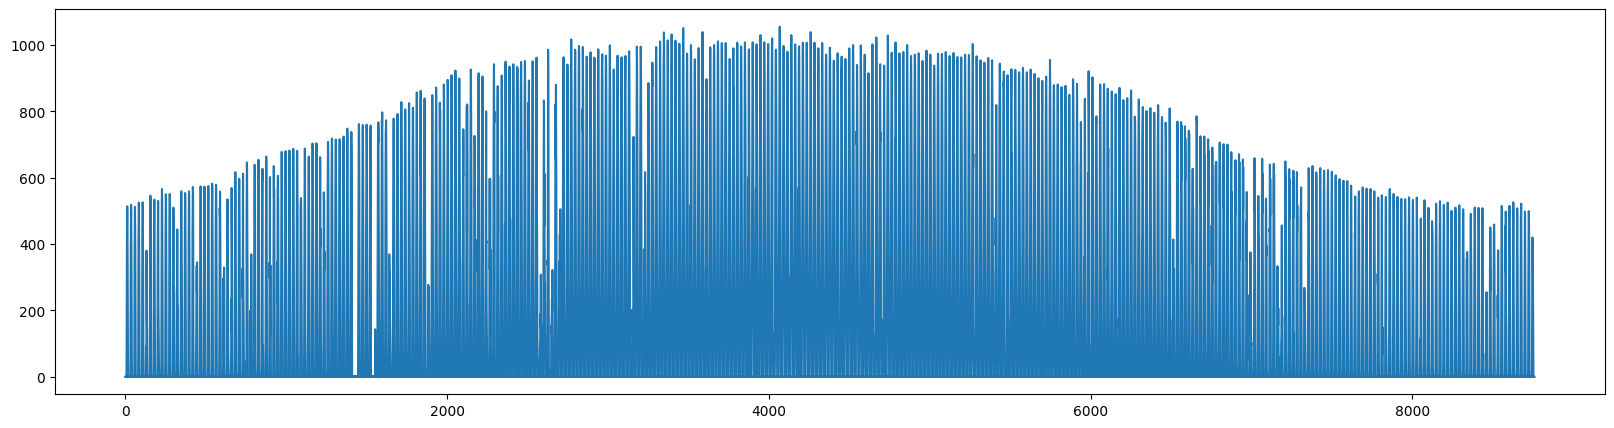

In [30]:
days = 365

plt.figure(figsize=(20, 5))
plt.plot(df["G(h)"][:24*days])
